导入相关库

In [517]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas import Series

读入数据

In [518]:
data_analysis = pd.read_csv('data_hd.csv')

In [519]:
data_analysis.shape

(130, 43)

In [520]:
data_analysis.columns

Index(['Unnamed: 0', '职位名称', '关键字', '薪资', '公司', '地区', '工作经验', '学历要求', 'Java',
       'Linux', 'Redis', 'Python', 'C', 'Sql', 'Git', 'Mongodb', 'Shell',
       'Github', 'Oracle', 'Hadoop', 'Unix', 'Spark', 'Hive', 'Or', 'Stack',
       'Tensorflow', 'Power', '数据库', '算法', '数据结构', '逻辑思维', '数据分析', '评估', '建模',
       '英语', '数据仓库', '决策', '人工智能', '机器学习', '数据模型', '数据清洗', '数字', '报表'],
      dtype='object')

添加薪资均值

In [521]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值----------------
    pattern = re.compile('\d+')
    salary = job_salary
    try:
        res = re.findall(pattern, salary)
        avg_salary = 0
        sum = 0
        for i in res:
            a = int(i)
            sum = sum + a
            avg_salary = sum / 2
    except Exception:
        avg_salary = 0
    # 函数返回值
    return avg_salary

salary_list = []
for i in range(0,data_analysis.shape[0]):
    avg_sal = average(data_analysis['薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

data_analysis.insert(9,'salary',sal)

薪资分布探索

In [522]:
data_analysis.salary.describe()

count    130.000000
mean      24.557692
std       15.123347
min        4.500000
25%       17.500000
50%       22.500000
75%       30.000000
max      165.000000
Name: salary, dtype: float64

In [523]:
data_analysis.columns

Index(['Unnamed: 0', '职位名称', '关键字', '薪资', '公司', '地区', '工作经验', '学历要求', 'Java',
       'salary', 'Linux', 'Redis', 'Python', 'C', 'Sql', 'Git', 'Mongodb',
       'Shell', 'Github', 'Oracle', 'Hadoop', 'Unix', 'Spark', 'Hive', 'Or',
       'Stack', 'Tensorflow', 'Power', '数据库', '算法', '数据结构', '逻辑思维', '数据分析',
       '评估', '建模', '英语', '数据仓库', '决策', '人工智能', '机器学习', '数据模型', '数据清洗', '数字',
       '报表'],
      dtype='object')

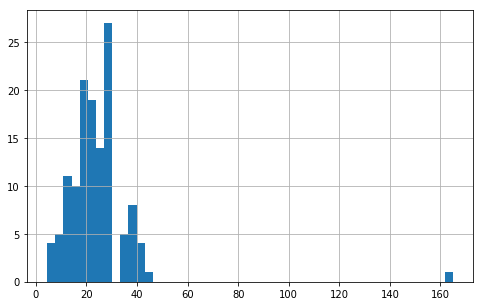

In [524]:
%matplotlib inline
import matplotlib.pyplot as plt
data_analysis.salary.hist(bins=50, figsize=(8,5))
plt.show()

从上图可以看出薪资主要分布在5k—35k之间

In [525]:
data_analysis[data_analysis.salary>35].shape

(16, 44)

In [526]:
data_analysis[data_analysis.salary<5].shape

(1, 44)

In [527]:
data_analysis = data_analysis[data_analysis['salary']<35]
data_analysis = data_analysis[data_analysis['salary']>5]

In [528]:
data_analysis.head(2)

,Unnamed: 0,职位名称,关键字,薪资,公司,地区,工作经验,学历要求,Java,salary,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
1,1,JAVA后端开发,后端开发,18-36K,携程旅行网,上海 长宁区 北新泾,1-3年,本科,1.0,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,java后端开发,后端开发,15-25K,泛微网络,上海 闵行区 浦江,3-5年,本科,1.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
data_analysis = data_analysis.drop(['Unnamed: 0','关键字','薪资'],axis=1)

掌握的软件技能对薪资的影响关系

In [530]:
corr_matrix = data_analysis.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary        1.000000
Github        0.241608
算法            0.214396
数据结构          0.171729
数据仓库          0.161309
Linux         0.157156
Python        0.145544
人工智能          0.135208
Stack         0.127111
Or            0.127111
机器学习          0.127111
Shell         0.124679
数据清洗          0.104715
逻辑思维          0.098817
Redis         0.098395
C             0.092933
建模            0.083683
Java          0.073476
Hive          0.065607
数据分析          0.060091
决策            0.035157
Git           0.033718
Power         0.030064
数据库           0.026566
Spark         0.000554
Hadoop       -0.007590
Tensorflow   -0.022192
Sql          -0.024457
数据模型         -0.031529
英语           -0.118589
报表           -0.126703
评估           -0.127410
Oracle       -0.133122
Unix         -0.149251
Mongodb      -0.157613
数字           -0.164029
Name: salary, dtype: float64

- **Data Analysis**的职位中，`github`,`算法`,`数据结构`是**薪资的加分项**。
- 同时，`Python`,`人工智能`,`机器学习`,也是数据分析师**区别于低薪**的因素。
- `英语`,`报表`作为必须的软件技能，对薪资变化**并没有太大的影响**，甚至仅仅会报表的职位沦落为专员，会是一个减分项。
- 结论：在数据分析领域，拥有**大数据软件技能**并且懂得**Python**这一编程语言的分析师的待遇较好。

## 模型方法选择
<pre>
线性回归
决策树回归
随机森林回归
KNN回归
Adaboost回归
GBRT回归
Bagging回归
ExtraTree极端随机树回归
</pre>

准备数据

In [531]:
data_analysis.head(2)

,职位名称,公司,地区,工作经验,学历要求,Java,salary,Linux,Redis,Python,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
1,JAVA后端开发,携程旅行网,上海 长宁区 北新泾,1-3年,本科,1.0,27.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,java后端开发,泛微网络,上海 闵行区 浦江,3-5年,本科,1.0,20.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [532]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_analysis, test_size=0.2, random_state=42)

In [533]:
data_train = train_set.copy()
data_test = test_set.copy()

In [534]:
data_train.shape

(88, 41)

In [535]:
data_test.shape

(22, 41)

In [536]:
import sklearn
sklearn.__version__

'0.21.2'

In [537]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [538]:
data_analysis.head(1)

,职位名称,公司,地区,工作经验,学历要求,Java,salary,Linux,Redis,Python,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
1,JAVA后端开发,携程旅行网,上海 长宁区 北新泾,1-3年,本科,1.0,27.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [539]:
data_test['工作经验']!="10年以上"

93      True
17      True
8       True
101    False
78      True
82      True
40      True
57      True
116     True
18      True
94      True
95      True
1       True
96      True
27      True
84      True
70      True
86      True
128     True
53      True
20      True
46      True
Name: 工作经验, dtype: bool

In [540]:
data_test=data_test[data_test['工作经验']!="10年以上"]

In [541]:
data_analysis_num = data_analysis.drop(['职位名称','公司','地区','工作经验','学历要求','salary'], axis=1)
num_attribs = list(data_analysis_num)
cat_attribs = ['学历要求','工作经验']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_analysis_prepared = full_pipeline.fit_transform(data_train)
data_analysis_test = full_pipeline.transform(data_test)

In [542]:
data_analysis_prepared[:1]

array([[ 0.93399166,  0.97752522, -0.71919495, -0.62994079, -0.59484969,
        -0.64757613, -0.52474977, -0.47140452, -0.47140452, -0.33752637,
        -0.35805744, -0.29397237, -0.27050089, -0.27050089, -0.15249857,
        -0.10721125, -0.10721125, -0.10721125, -0.10721125, -1.32287566,
         1.39044357,  1.58745079, -0.29397237, -0.29397237, -0.24544035,
        -0.18786729,  5.32290647, -0.15249857, -0.15249857, -0.10721125,
        -0.10721125, -0.10721125, -0.10721125, -0.10721125, -0.10721125,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ]])

In [543]:
data_train.head(1)

,职位名称,公司,地区,工作经验,学历要求,Java,salary,Linux,Redis,Python,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
79,后端开发工程师实习生,思科,上海 徐汇区 漕河泾,经验不限,本科,1.0,6.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [544]:
data_analysis_labels = data_train.salary.values
test_labels = data_test.salary.values

训练模型

## 线性回归

In [545]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_analysis_prepared, data_analysis_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [546]:
from sklearn.metrics import mean_squared_error
import numpy as np

salary_predictions = lin_reg.predict(data_analysis_prepared)
lin_mse = mean_squared_error(data_analysis_labels, salary_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.2267799681473175

In [547]:
y_test = lin_reg.predict(data_analysis_test)
y_test[:10]

array([19.83335661, 28.23948445, 23.12895143, 20.36307833,  9.26136354,
       18.73883694, 18.922609  , 23.07411305, 23.67302117, 19.4258067 ])

In [548]:
test_labels[:10]

array([22.5, 30. , 27. , 20. , 20. , 21. , 18. , 25. , 30. , 15.5])

In [549]:
lin_mse = mean_squared_error(test_labels, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.649603152842213

测试集上误差约为5.5

交叉验证

In [550]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [551]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1.17805667e+01 1.30486026e+15 6.62763191e+00 4.49584581e+00
 5.02507195e+00 7.02185493e+00 8.98903296e+00 5.52346174e+00
 7.23762238e+00 1.05686414e+01]
Mean: 130486026490605.38
Standard deviation: 391458079471793.75


## 决策树回归

In [552]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_analysis_prepared, data_analysis_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [553]:
y_pred_tree = tree_reg.predict(data_analysis_prepared)

In [554]:
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(data_analysis_labels, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8065780692643346

In [555]:
y_test = tree_reg.predict(data_analysis_test)
y_test[:10]

array([20. , 20. , 25. , 20. , 22.5, 20. , 12. , 27.5, 23.5, 10.5])

In [556]:
test_labels[:10]

array([22.5, 30. , 27. , 20. , 20. , 21. , 18. , 25. , 30. , 15.5])

In [557]:
tree_mse = mean_squared_error(test_labels, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

5.844716784046451

测试集上误差约为5.8

## Random Forest 随机森林回归

In [558]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=52)
forest_reg.fit(data_analysis_prepared, data_analysis_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=52, verbose=0,
                      warm_start=False)

In [559]:
y_pred_rf = forest_reg.predict(data_analysis_prepared)
forest_mse = mean_squared_error(data_analysis_labels, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.2901164705069146

In [560]:
y_test = forest_reg.predict(data_analysis_test)
y_test[:10]

array([20.8       , 23.16666667, 24.15      , 18.4       , 12.4       ,
       21.85416667, 17.2       , 27.95      , 20.9       , 16.3       ])

In [561]:
test_labels[:10]

array([22.5, 30. , 27. , 20. , 20. , 21. , 18. , 25. , 30. , 15.5])

In [562]:
forest_mse = mean_squared_error(test_labels, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

5.217140727864126

测试集上误差约为5.2

交叉验证

In [563]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [564]:
display_scores(forest_rmse_scores)

Scores: [9.13703798 5.47325286 6.55202883 6.48551107 5.03154632 8.7929146
 8.29669911 4.45919774 9.38183084 7.63483307]
Mean: 7.124485241147913
Standard deviation: 1.6885167456669572


## knn回归

In [565]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(data_analysis_prepared, data_analysis_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [566]:
y_pred_knn = knn_reg.predict(data_analysis_prepared)
knn_mse = mean_squared_error(data_analysis_labels, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

5.788762624885626

交叉验证

In [567]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-scores)


display_scores(knn_rmse_scores)

Scores: [8.52141094 5.91814536 6.65298596 5.3536073  5.86230899 6.14880295
 8.93028555 4.92871405 5.557315   9.15      ]
Mean: 6.702357610408733
Standard deviation: 1.4889312781606259


In [568]:
y_test = knn_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[17.8 22.7 20.7 15.9 19.3 19.8 21.6 23.  20.6 16.6]
[22.5 30.  27.  20.  20.  21.  18.  25.  30.  15.5]


In [569]:
knn_mse = mean_squared_error(test_labels, y_test)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

5.837563092347941

## Adaboost回归

In [570]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_reg = AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
Adaboost_reg.fit(data_analysis_prepared, data_analysis_labels)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

交叉验证

In [571]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Adaboost_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
Adaboost_rmse_scores = np.sqrt(-scores)

In [572]:
display_scores(Adaboost_rmse_scores)

Scores: [9.45688246 5.66377299 6.87379784 3.97696518 4.72218284 6.83970562
 7.81652218 4.06900982 7.37613482 7.34198781]
Mean: 6.4136961559125085
Standard deviation: 1.6813360427414505


In [573]:
y_test = Adaboost_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[20.55555556 20.86666667 20.86666667 20.01190476 17.88       20.
 20.55555556 23.05172414 20.01190476 18.29166667]
[22.5 30.  27.  20.  20.  21.  18.  25.  30.  15.5]


In [574]:
Adaboost_mse = mean_squared_error(test_labels, y_test)
Adaboost_rmse = np.sqrt(Adaboost_mse)
Adaboost_rmse

5.292250654707787

## GBRT回归

In [575]:
from sklearn.ensemble import GradientBoostingRegressor
grbt_reg = GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
grbt_reg.fit(data_analysis_prepared, data_analysis_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

交叉验证

In [576]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grbt_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
grbt_rmse_scores = np.sqrt(-scores)

display_scores(grbt_rmse_scores)

Scores: [11.4562316   6.26395794  6.90059418  4.8348853   4.42512174  9.11204067
  7.24942417  4.59356802  6.98405416  7.95849135]
Mean: 6.977836911988703
Standard deviation: 2.0725648410820816


In [577]:
y_test = grbt_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[19.17560923 22.66495697 22.28684588 19.95489697 14.49817819 21.26739085
 18.56419236 23.33686476 22.38674543 20.15441223]
[22.5 30.  27.  20.  20.  21.  18.  25.  30.  15.5]


In [578]:
grbt_mse = mean_squared_error(test_labels, y_test)
grbt_rmse = np.sqrt(grbt_mse)
grbt_rmse

5.244733541864395

## Bagging回归

In [579]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging_reg.fit(data_analysis_prepared, data_analysis_labels)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

交叉验证

In [580]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bagging_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
bagging_rmse_scores = np.sqrt(-scores)

display_scores(bagging_rmse_scores)

Scores: [8.804494   6.65690953 7.04517226 5.07682377 5.47199943 7.73073072
 8.17864767 4.7875417  8.56444321 7.6398904 ]
Mean: 6.995665269836799
Standard deviation: 1.381457439981226


In [581]:
y_test = bagging_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[22.1  23.7  22.85 19.65 12.65 20.   17.75 22.1  21.2  19.05]
[22.5 30.  27.  20.  20.  21.  18.  25.  30.  15.5]


In [582]:
bagging_mse = mean_squared_error(test_labels, y_test)
bagging_rmse = np.sqrt(bagging_mse)
bagging_rmse

5.460958489648258

# 模型拟合效果评价

In [583]:
model_list = [lin_rmse,tree_rmse,forest_rmse,knn_rmse,Adaboost_rmse,grbt_rmse,bagging_rmse]
model_name = ['linear','tree','forest','knn','Adaboost','grbt','bagging']
i = 0
for model in model_list:
    print(model_name[i],'在测试集上的误差表现为：',model)
    i+=1

linear 在测试集上的误差表现为： 5.649603152842213
tree 在测试集上的误差表现为： 5.844716784046451
forest 在测试集上的误差表现为： 5.217140727864126
knn 在测试集上的误差表现为： 5.837563092347941
Adaboost 在测试集上的误差表现为： 5.292250654707787
grbt 在测试集上的误差表现为： 5.244733541864395
bagging 在测试集上的误差表现为： 5.460958489648258


# 网格搜索调参

### 对随机森林进行参数探索调整

In [584]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

#grbt_reg = GradientBoostingRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_analysis_prepared, data_analysis_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [585]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.876256958813433 {'max_features': 2, 'n_estimators': 3}
6.886169187090332 {'max_features': 2, 'n_estimators': 10}
6.504071960110033 {'max_features': 2, 'n_estimators': 30}
7.3750957069252685 {'max_features': 4, 'n_estimators': 3}
6.733178370741578 {'max_features': 4, 'n_estimators': 10}
6.771520212828127 {'max_features': 4, 'n_estimators': 30}
7.95550093267462 {'max_features': 6, 'n_estimators': 3}
6.9524811264131685 {'max_features': 6, 'n_estimators': 10}
6.989545518797587 {'max_features': 6, 'n_estimators': 30}
7.999318240450806 {'max_features': 8, 'n_estimators': 3}
7.002178029662693 {'max_features': 8, 'n_estimators': 10}
6.838736370000148 {'max_features': 8, 'n_estimators': 30}
7.7590977880710135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
7.121952597905871 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
7.274991756043786 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
7.203268769517704 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [586]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

变量重要性

In [587]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [588]:
num_attribs = list(data_analysis_num)
cat_attribs = ['学历要求','工作经验']

In [589]:
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.07338468832310081, 'Java'),
 (0.06120699481310242, '数据库'),
 (0.05688553442592843, 'Mongodb'),
 (0.04294979447254941, 'Redis'),
 (0.04228851712734148, 'Linux'),
 (0.04114116383060633, 'Python'),
 (0.03928338354807782, 'Github'),
 (0.038616622115309376, '数据结构'),
 (0.037705633745815224, 'Sql'),
 (0.035085887129528245, '算法'),
 (0.03330332412999181, 'C'),
 (0.029126777837731464, '英语'),
 (0.028653579361848303, 'Git'),
 (0.022452147765656665, '工作经验'),
 (0.02163728199803094, '数据分析'),
 (0.021224934183387247, 'Oracle'),
 (0.020349616678286685, 'Shell'),
 (0.01872541244025475, 'Unix'),
 (0.016312330595923803, '逻辑思维'),
 (0.015148268129013091, '评估'),
 (0.010459829817083911, 'Hadoop'),
 (0.010206816106737016, '机器学习'),
 (0.009310841812600225, '学历要求'),
 (0.008145236341092188, '数字'),
 (0.007328839106266257, '报表'),
 (0.007009677101295122, 'Or'),
 (0.006083303854939952, 'Spark'),
 (0.005984032736314824, 'Hive'),
 (0.005928035935806373, '建模'),
 (0.005350382806178234, '数据清洗'),
 (0.004000520773830186, '

工作经验和学历要求对工资都有一定的影响

# 最终模型

In [590]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [591]:
scores = cross_val_score(final_model, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
final_model_rmse_scores = np.sqrt(-scores)

In [592]:
display_scores(final_model_rmse_scores)

Scores: [8.57270425 6.97548462 6.97266395 5.10168044 4.28676045 7.11723911
 7.78498439 5.06129711 7.40214695 8.40817356]
Mean: 6.768313483293616
Standard deviation: 1.3941461847104482


交叉验证误差为4.7

# 薪资预测

In [593]:
final_predictions = final_model.predict(data_analysis_test)

In [594]:
salary_test_series = Series(final_predictions,index=data_test.index)

In [595]:
data_test_prediction = data_test.copy()
data_test_prediction.insert(7,'prediction',salary_test_series)

In [596]:
data_test_prediction.sample(10)

,职位名称,公司,地区,工作经验,学历要求,Java,salary,prediction,Linux,Redis,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
128,高级后端开发工程师,英檬科技,上海 长宁区 中山公园,5-10年,大专,0.0,22.5,22.133333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,python后端开发工程师,上海爱数,上海 闵行区 浦江,3-5年,本科,1.0,27.0,22.516667,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
86,后端开发工程师,上海臻言咨询有限公司,上海 徐汇区 徐家汇,3-5年,本科,1.0,24.0,22.800000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Python后端开发,链盟,上海 静安区 火车站,3-5年,本科,0.0,30.0,19.783333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NodeJS后端开发,PACTERA,上海 浦东新区 金桥,3-5年,本科,1.0,27.0,22.297222,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,后端开发工程师,英檬科技,上海 长宁区 中山公园,3-5年,大专,0.0,20.0,19.033333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,后端开发工程师,上海边界智能科技,上海 浦东新区 张江,3-5年,本科,1.0,21.0,19.930556,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,后端开发工程师,小红书,上海 黄浦区 新天地,3-5年,本科,1.0,30.0,20.575000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,后端开发工程师（上海）,灵雀云,上海 浦东新区 潍坊,5-10年,本科,1.0,25.0,21.150000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,后端开发工程师,苏州智加科技有限...,上海 长宁区 江苏路,3-5年,本科,1.0,30.0,22.416667,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


- 预测结果与实际薪资相比误差在**可接受范围内**。

# 预测函数接口

In [597]:
data_test.head(1)

,职位名称,公司,地区,工作经验,学历要求,Java,salary,Linux,Redis,Python,...,建模,英语,数据仓库,决策,人工智能,机器学习,数据模型,数据清洗,数字,报表
93,资深后端开发工程师,斑马互动,上海 浦东新区 张江,5-10年,本科,0.0,22.5,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [598]:
from pandas import DataFrame

### 预测功能函数

In [599]:
def prediction_function(degree,experience,v_skills):
    predict_X = {
        '学历要求':[degree],
        '工作经验':[experience],
       'Java':[v_skills[0]],
       'Linux':[v_skills[1]],
       'Redis':[v_skills[2]],
       'Python':[v_skills[3]],
       'C':[v_skills[4]],
       'Sql':[v_skills[5]],
       'Git':[v_skills[6]],
       'Mongodb':[v_skills[7]],
        'Shell':[v_skills[8]],
         'Github':[v_skills[9]],
      'Oracle':[v_skills[10]],
          'Hadoop':[v_skills[11]],
         'Unix':[v_skills[12]],
         'Spark':[v_skills[13]],
          'Hive':[v_skills[14]],
          'Or':[v_skills[15]],
         'Stack':[v_skills[16]],
          'Tensorflow':[v_skills[17]],
         'Power':[v_skills[18]],
           '数据库':[v_skills[19]],
         '算法':[v_skills[20]],
          '数据结构':[v_skills[21]],
         '逻辑思维':[v_skills[22]],
         '数据分析':[v_skills[23]],
         '评估':[v_skills[24]],
         '建模':[v_skills[25]],
         '英语':[v_skills[26]],
         '数据仓库':[v_skills[27]],
         '决策':[v_skills[28]],
        '人工智能':[v_skills[29]],
         '机器学习':[v_skills[30]],
         '数据模型':[v_skills[31]],
         '数据清洗':[v_skills[32]],
        '数字':[v_skills[33]],
          '报表':[v_skills[34]],
    }
    predict_tmp = pd.DataFrame(predict_X)
    X_predict = full_pipeline.transform(predict_tmp)
    return X_predict

In [600]:
data_test.columns

Index(['职位名称', '公司', '地区', '工作经验', '学历要求', 'Java', 'salary', 'Linux', 'Redis',
       'Python', 'C', 'Sql', 'Git', 'Mongodb', 'Shell', 'Github', 'Oracle',
       'Hadoop', 'Unix', 'Spark', 'Hive', 'Or', 'Stack', 'Tensorflow', 'Power',
       '数据库', '算法', '数据结构', '逻辑思维', '数据分析', '评估', '建模', '英语', '数据仓库', '决策',
       '人工智能', '机器学习', '数据模型', '数据清洗', '数字', '报表'],
      dtype='object')

### 技能转换函数

In [601]:
def skills_switch(skill_list):
    tmp_list = []
    skills = ['Java', 'salary', 'Linux', 'Redis',
       'Python', 'C', 'Sql', 'Git', 'Mongodb', 'Shell', 'Github', 'Oracle',
       'Hadoop', 'Unix', 'Spark', 'Hive', 'Or', 'Stack', 'Tensorflow', 'Power',
       '数据库', '算法', '数据结构', '逻辑思维', '数据分析', '评估', '建模', '英语', '数据仓库', '决策',
       '人工智能', '机器学习', '数据模型', '数据清洗', '数字', '报表']
    for skill in skills:
        # 大小写转换
        if skill in skill_list:
            tmp_list.append(1)
        else:
            tmp_list.append(0)
    return tmp_list

### 预测主函数

In [602]:
def predict(degree,experience,v_skills):
    X_predict = prediction_function(degree,experience,v_skills)
    Y_predict = final_model.predict(X_predict)
    print('预测薪资为：',Y_predict[0],'k/month')

### 预测函数

In [603]:
#-----------设置变量
degree = '本科'
experience = '1-3年'
# ------------------
# --------设置所掌握的技能（顺序无关）
mastered_skills = ['Sql','Python','Excel','Spss','Ppt']
v_skills = skills_switch(mastered_skills)
# -----------------------------------
predict(degree,experience,v_skills)

预测薪资为： 16.883333333333333 k/month


In [604]:
experiences = ['1年以内', '1-3年','3-5年', '5-10年' ]

for exp in experiences:
    print('|',degree,'|',exp,'|',",".join(mastered_skills))
    predict(degree,exp,v_skills)
    print('-'*60)

| 本科 | 1年以内 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 16.438888888888886 k/month
------------------------------------------------------------
| 本科 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 16.883333333333333 k/month
------------------------------------------------------------
| 本科 | 3-5年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 18.433333333333334 k/month
------------------------------------------------------------
| 本科 | 5-10年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 21.066666666666666 k/month
------------------------------------------------------------


In [605]:
experience = '1-3年'
degrees = ['学历不限','大专','本科','硕士']

for degree in degrees:
    print('|',degree,'|',experience,'|',",".join(mastered_skills))
    predict(degree,exp,v_skills)
    print('-'*60)

| 学历不限 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 19.033333333333335 k/month
------------------------------------------------------------
| 大专 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 20.45 k/month
------------------------------------------------------------
| 本科 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 21.066666666666666 k/month
------------------------------------------------------------
| 硕士 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 21.75 k/month
------------------------------------------------------------


In [608]:
predict('本科','1-3年', skills_switch(['Sql','Python','Excel','Spss','Ppt']))

预测薪资为： 16.883333333333333 k/month


## 保存模型

In [609]:
from sklearn.externals import joblib

In [610]:
joblib.dump(final_model, "预测薪资2.0.pkl")

['预测薪资2.0.pkl']

In [612]:
clf = joblib.load("预测薪资2.0.pkl")